### Importing required modules

In [15]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading database

In [3]:
database= sqlite3.connect("inventory.db")

### Fetching vendor summary

In [4]:
df= pd.read_sql_query("""
    SELECT *
    FROM vendor_sales_summary
""", database)

In [8]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesQuantity,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPriceRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5.101920e+06,142049.0,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,160247.0,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4.538121e+06,187140.0,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4.475973e+06,200412.0,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4.223108e+06,135838.0,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [30]:
df.shape

(10692, 18)

### Analyzing resultant table to gain insights into the distribution of each field to identify patterns, anomalies and data quality

#### Summary Statistics

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [31]:
df.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                   float64
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesDollars        float64
TotalSalesQuantity       float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
GrossProfit              float64
ProfitMargin             float64
StockTurnover            float64
SalesToPriceRatio        float64
dtype: object

#### Histogram plots for identifying numerical field distribution

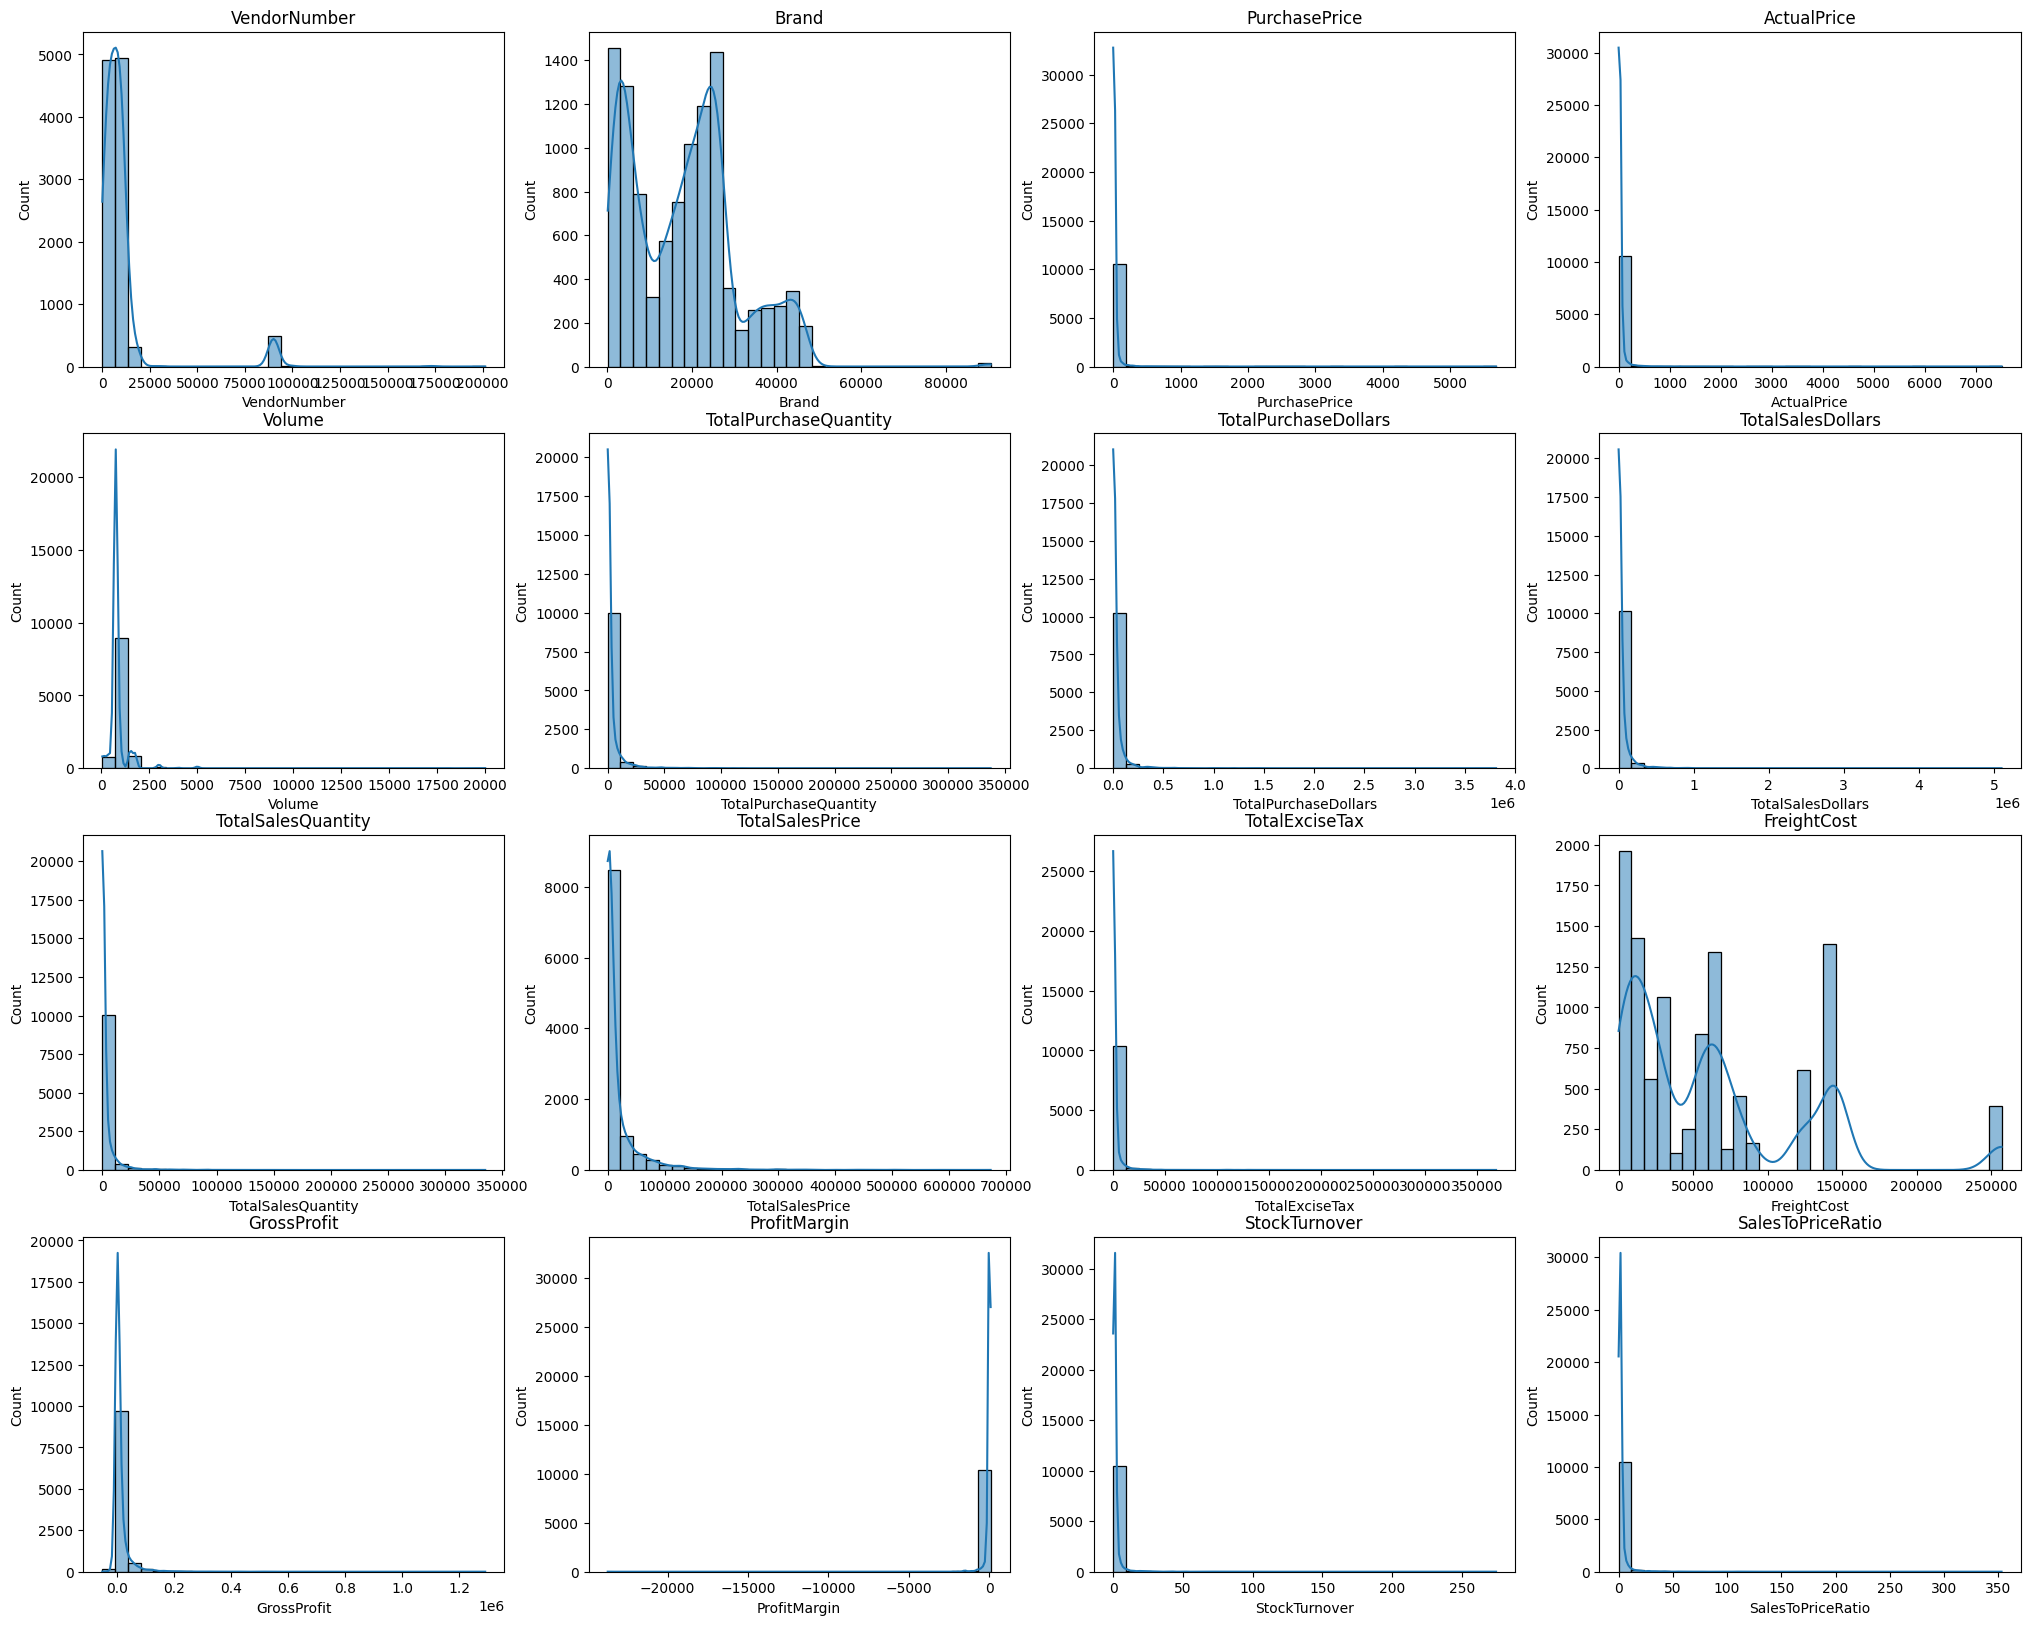

In [29]:
numerical_fields = df.select_dtypes(include= np.number).columns

plt.figure(figsize= (25, 20))

for i, field in enumerate(numerical_fields):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[field], kde= True, bins= 30)
    plt.title(field)

plt.tight_layout
plt.show()

#### Box plot for identifying outliers

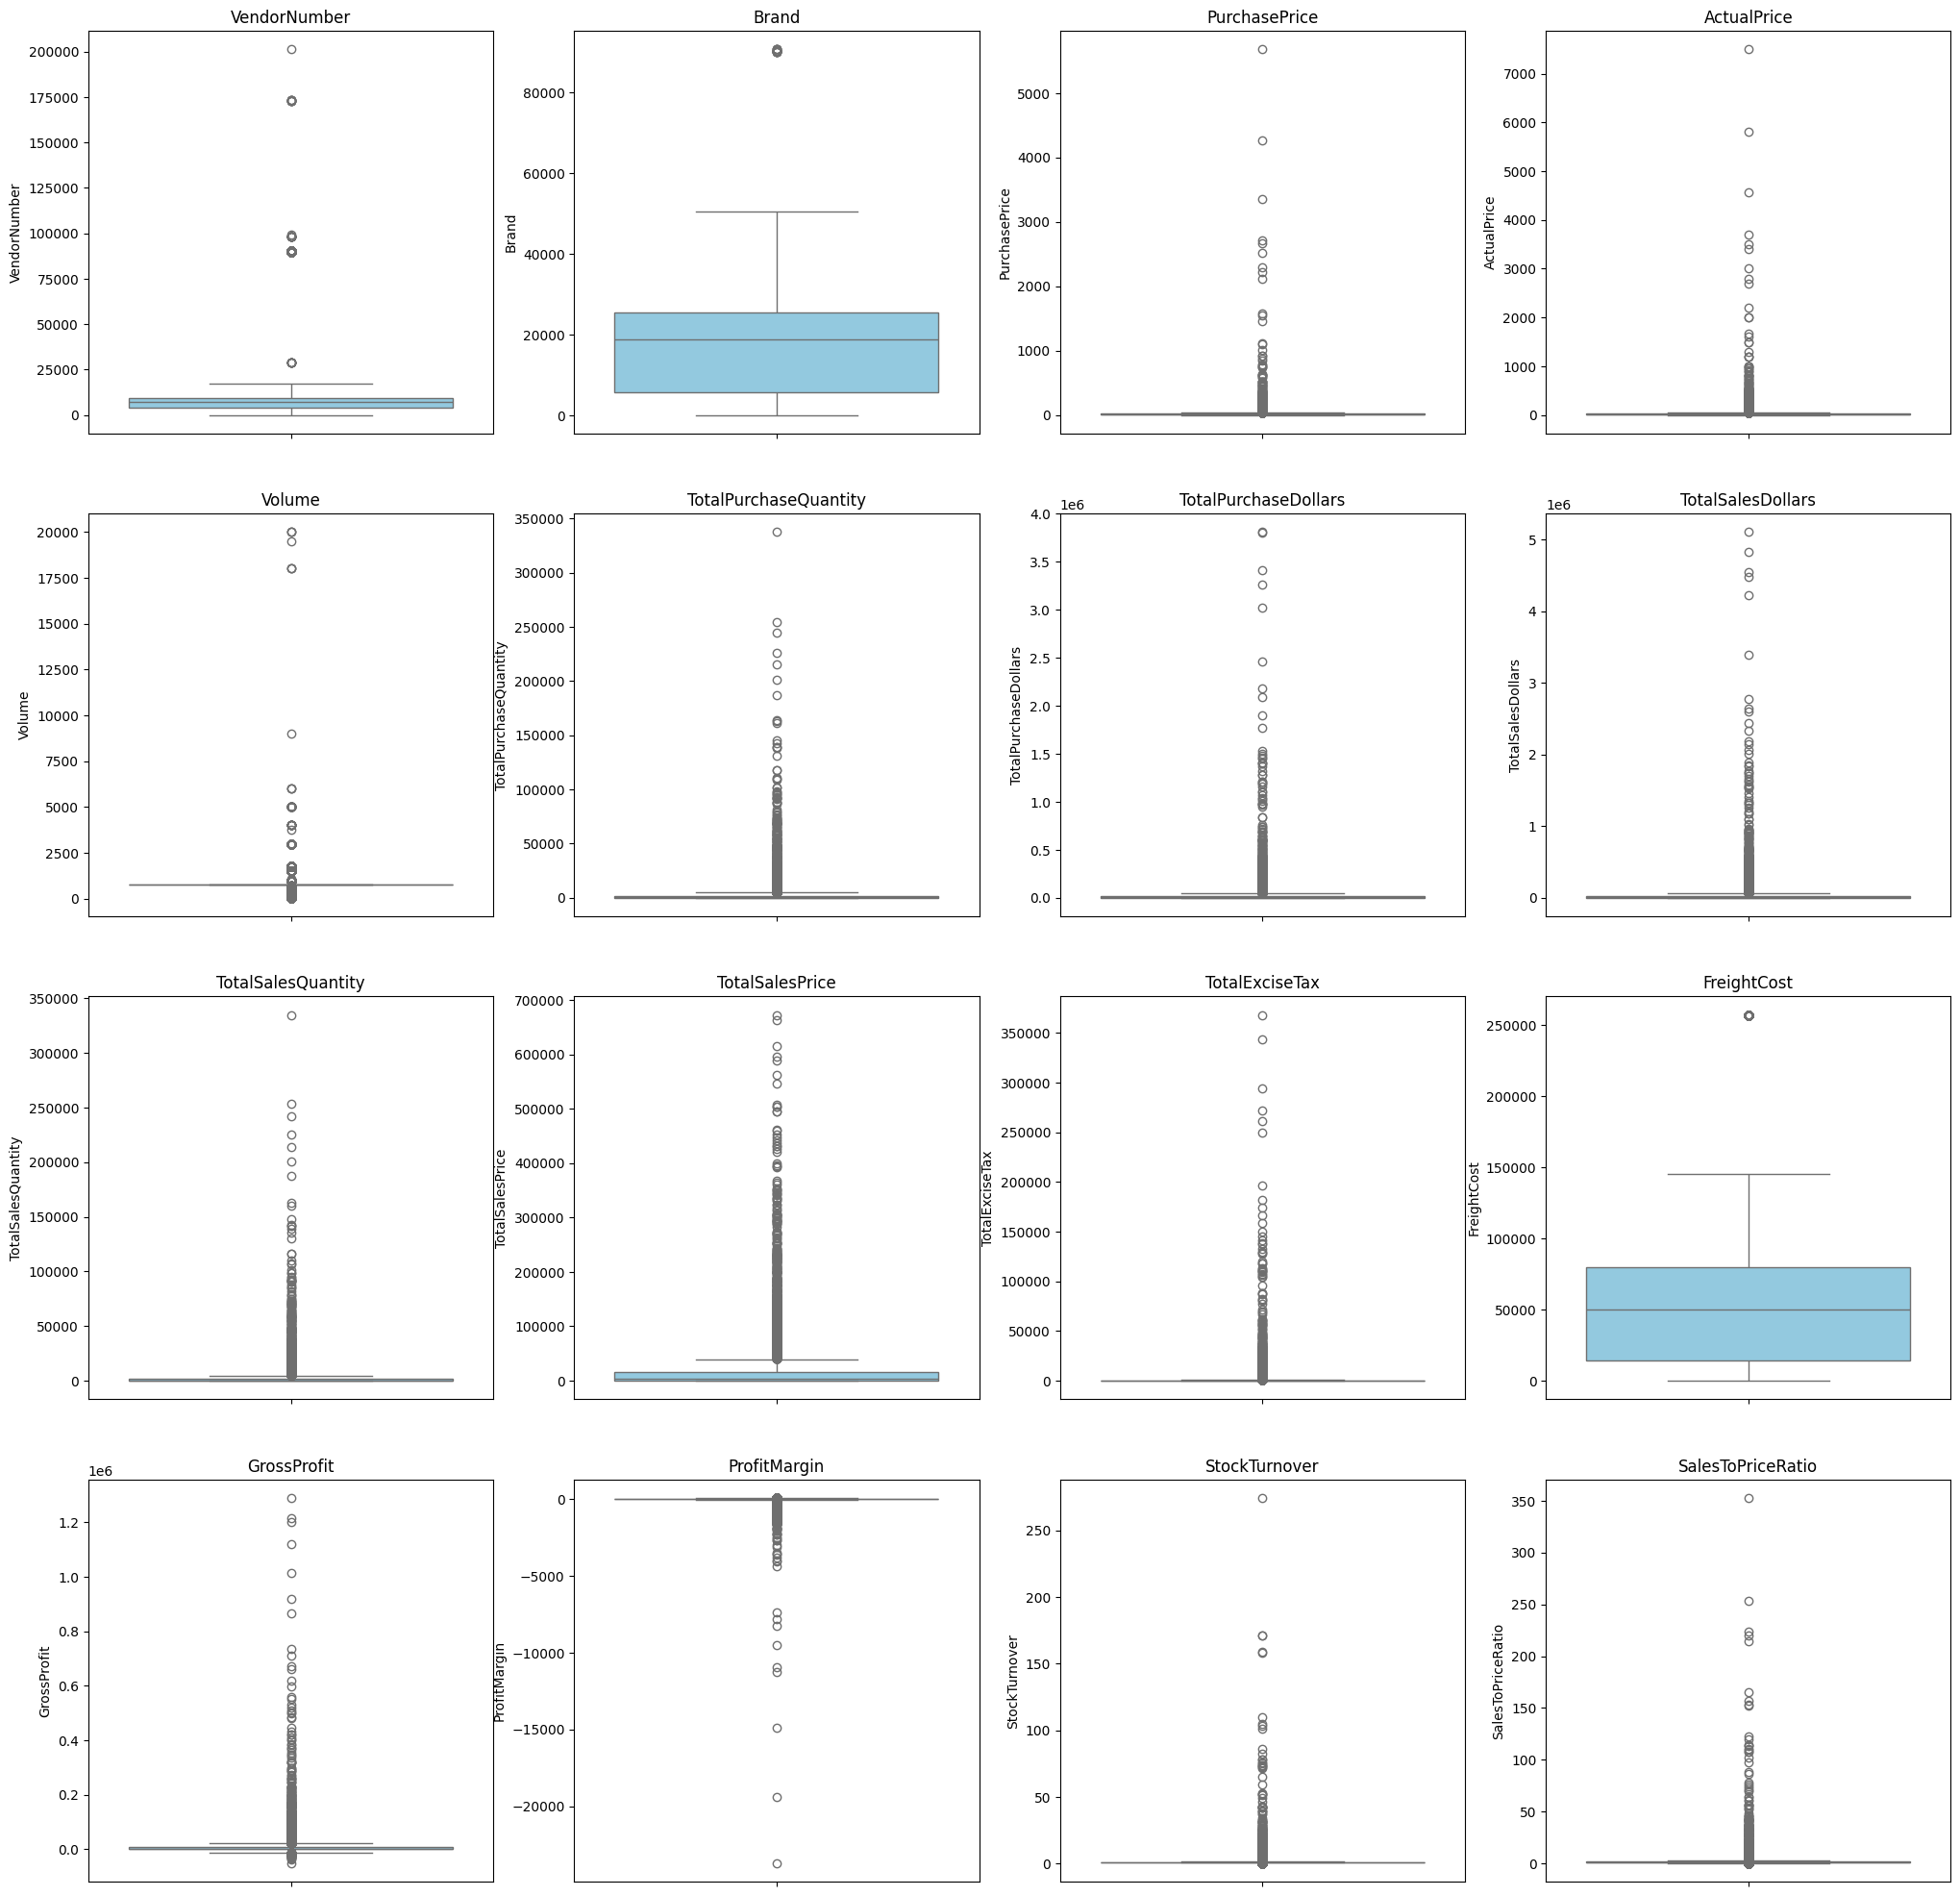

In [39]:
plt.figure(figsize= (25, 25))

for i, field in enumerate(numerical_fields):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y= df[field], color= "skyblue")
    plt.title(field)

plt.tight_layout
plt.show()

## Summary Statistics Insights

### Zero & Negative Values:
- The Gross Profit shows its lowest point at -52,002.78 which indicates business losses occur. The business operates at a loss because it sells products at prices that are lower than their purchase costs.

- The Profit Margin reaches its lowest point at negative infinity because there exist situations where revenue equals zero or exceeds costs.

- The minimum values of Total Sales Quantity and Sales Dollars reach zero which shows that certain products were bought but remained unsold. The inventory consists of products that do not sell well and products that have become outdated.

### Outliers:
- The maximum values of Purchase & Actual Prices at 5,681.81 and 7,499.99 exceed their corresponding means of 24.39 and 35.64 which points to expensive premium products.

- The wide range of freight costs from 0.09 to 257,032.07 indicates poor logistics management and possibly large volume deliveries.

- Stock Turnover shows a wide range from 0 to 274.5 which indicates that some products have quick sales while others stay in inventory for extended periods. A value above 1 in this metric shows that product sales exceed initial stock purchases because older inventory supplies the fulfilled orders.